#### 군집화(Clustering)

##### K-Means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

- Iris 데이터

In [3]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

In [4]:
from sklearn.cluster import KMeans
KMeans().get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [5]:
kmeans = KMeans(n_clusters=3, random_state=2022)
kmeans.fit(iris_std)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [6]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([53, 50, 47], dtype=int64))

In [7]:
df = pd.DataFrame({
    'PC1':iris_pca[:,0], 'PC2':iris_pca[:,1], 'cluster':kmeans.labels_,
    'target':iris.target
})

In [8]:
df.tail()

,PC1,PC2,cluster,target
145,1.870503,0.386966,2,2
146,1.564580,-0.896687,0,2
147,1.521170,0.269069,2,2
148,1.372788,1.011254,2,2
149,0.960656,-0.024332,0,2


In [9]:
df.groupby(['target','cluster'])['PC1'].count()

target  cluster
0       1          50
1       0          39
        2          11
2       0          14
        2          36
Name: PC1, dtype: int64

d:\edu\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

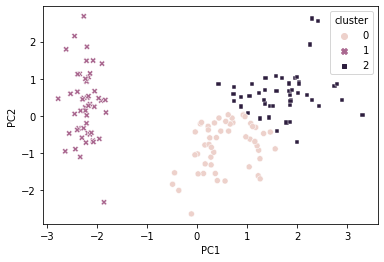

In [11]:
import seaborn as sns
sns.scatterplot('PC1','PC2', data=df, hue='cluster', style='cluster')

d:\edu\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

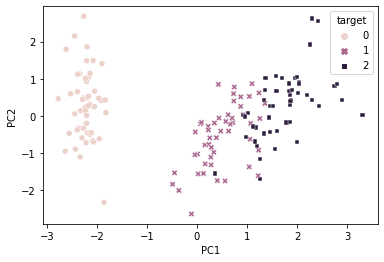

In [12]:
sns.scatterplot('PC1','PC2', data=df, hue='target', style='target')

d:\edu\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\edu\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


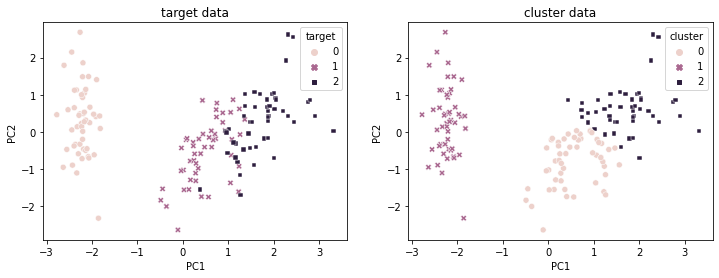

In [15]:
plt.figure(figsize=(12,4))
for k, columns in enumerate(['target','cluster']):
    plt.subplot(1,2, k+1)
    plt.title(columns+' data')
    sns.scatterplot('PC1','PC2', data=df, hue=columns, style=columns)
plt.show()

- Wine 데이터

In [16]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
wine_std = StandardScaler().fit_transform(load_wine().data)

pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2022)
kmeans.fit(wine_std)

df = pd.DataFrame({
    'PC1':wine_pca[:,0], 'PC2':wine_pca[:,1],
    'cluster':kmeans.labels_, 'target':load_wine().target
})
df.head()

,PC1,PC2,cluster,target
0,3.316751,-1.443463,2,0
1,2.209465,0.333393,2,0
2,2.516740,-1.031151,2,0
3,3.757066,-2.756372,2,0
4,1.008908,-0.869831,2,0


In [21]:
# kmeans 센터의 위치
kmeans.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

d:\edu\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\edu\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\edu\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


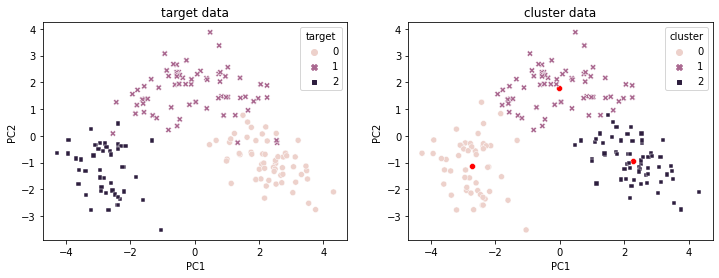

In [29]:
plt.figure(figsize=(12,4))
for k, columns in enumerate(['target','cluster']):
    plt.subplot(1,2, k+1)
    plt.title(columns+' data')
    if columns == 'cluster':
        sns.scatterplot(df.groupby(['cluster'])[['PC1','PC2']].mean()['PC1'],df.groupby(['cluster'])[['PC1','PC2']].mean()['PC2'], 
        data = df.groupby(['cluster'])[['PC1','PC2']].mean(), color='red')
    sns.scatterplot('PC1','PC2', data=df, hue=columns, style=columns)
    
plt.show()

- 실루엣 분석: 군집화(Clustering) 평가

In [30]:
kmeans = KMeans(n_clusters=3, random_state=2022)
kmeans.fit(iris_std)


KMeans(n_clusters=3, random_state=2022)

In [31]:
df = pd.DataFrame(iris.data, columns= ['sl','sw','pl','pw'])
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df.head()

,sl,sw,pl,pw,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score

sil_sample = silhouette_samples(iris_std, kmeans.labels_)
df['sil_coef'] = sil_sample
df.head()

,sl,sw,pl,pw,target,cluster,sil_coef
0,5.1,3.5,1.4,0.2,0,1,0.734195
1,4.9,3.0,1.4,0.2,0,1,0.568274
2,4.7,3.2,1.3,0.2,0,1,0.677547
3,4.6,3.1,1.5,0.2,0,1,0.620502
4,5.0,3.6,1.4,0.2,0,1,0.728474


In [34]:
# 실루엣 점수: 실루엣 계수의 평균
silhouette_score(iris_std, kmeans.labels_), df.sil_coef.mean()

(0.45994823920518635, 0.45994823920518635)

In [35]:
df.groupby('cluster').sil_coef.mean()

cluster
0    0.393377
1    0.636316
2    0.347392
Name: sil_coef, dtype: float64

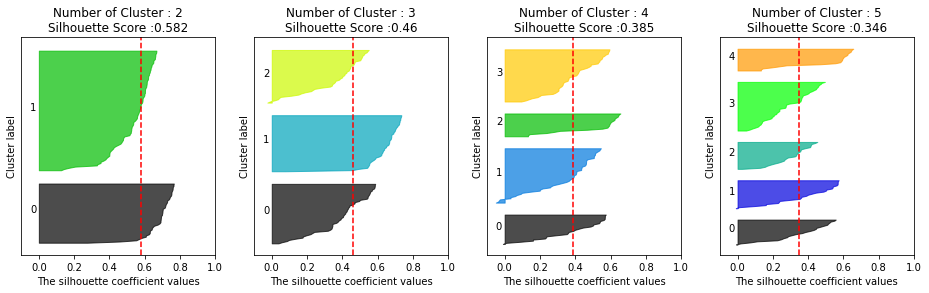

In [36]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5], iris_std)